<a href="https://colab.research.google.com/github/amazzoli/ComponentSystemsData/blob/main/datasets/proteomes/inspect_objects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Cloning the repository in the colab folder structure
%%bash
git clone https://github.com/amazzoli/ComponentSystemsData.git

Cloning into 'ComponentSystemsData'...


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, sys

# Changing directory where the notebook is placed
os.chdir('/content/ComponentSystemsData/datasets/proteomes')

sys.path.append('/content/ComponentSystemsData/py_utils/')
import plot_utils as pu

# Inspecting proteomes objects: **bacterial genomes**

The table `objects.tsv` contains information about genomes:

- **sparse_id**: identifier of the matrix coordinates in the sparse representation.
- Taxonomical classifications from **genus** to **domain** (Bacteria). **species_id** corrsesponds to the identifier of the dataset https://www.uniprot.org/.
- **size**: number of proteins labeled with a family in the genome.
- **vocabulary**: number of protein families in the genome.

In [5]:
data_folder = 'data/'
objects = pd.read_csv(data_folder+'objects.tsv', sep='\t', index_col=0)

In [6]:
objects

,specie_id,genus,family,order,class,phylum,clade,kingdom,domain,size,vocabulary
sparse_id,,,,,,,,,,,
0,1234679,Carnobacterium,Carnobacteriaceae,Lactobacillales,Bacilli,Bacillota,NaN,Bacillati,Bacteria,4080,1897
1,312153,Polynucleobacter,Burkholderiaceae,Burkholderiales,Betaproteobacteria,Pseudomonadota,NaN,Pseudomonadati,Bacteria,2744,1746
2,379731,Stutzerimonas,Pseudomonadaceae,Pseudomonadales,Gammaproteobacteria,Pseudomonadota,NaN,Pseudomonadati,Bacteria,5636,2694
3,369723,Salinispora,Micromonosporaceae,Micromonosporales,Actinomycetes,Actinomycetota,NaN,Bacillati,Bacteria,5269,2197
4,349521,Hahella,Hahellaceae,Oceanospirillales,Gammaproteobacteria,Pseudomonadota,NaN,Pseudomonadati,Bacteria,7402,3052
...,...,...,...,...,...,...,...,...,...,...,...
8863,2864201,Aureispira,Saprospiraceae,Saprospirales,Saprospiria,Bacteroidota,FCB group,Pseudomonadati,Bacteria,5751,2275
8864,2795293,Desulfolithobacter,Desulfobulbaceae,Desulfobulbales,Desulfobulbia,Thermodesulfobacteriota,NaN,Pseudomonadati,Bacteria,4073,1909
8867,2980174,NaN,NaN,NaN,NaN,Candidatus Saccharimonadota,Bacteria candidate phyla,NaN,Bacteria,871,649


### Size distribution

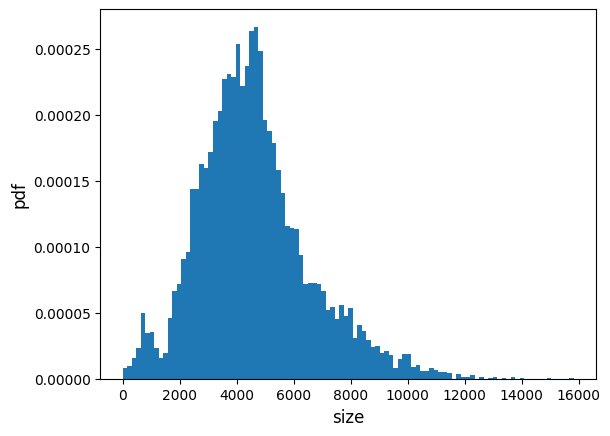

In [7]:
plt.xlabel('size', fontsize=12)
plt.ylabel('pdf', fontsize=12)
h = plt.hist(objects['size'], bins=100, density=True)

### Heaps' law

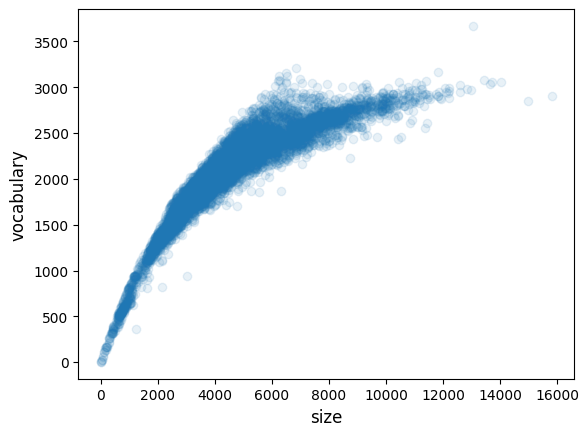

In [8]:
plt.xlabel('size', fontsize=12)
plt.ylabel('vocabulary', fontsize=12)
img = plt.scatter(objects['size'], objects['vocabulary'], alpha=0.1)

### Genome counts of taxonomical units

In [10]:
taxa_units = list(objects.columns[1:-3])
print('List of possibile taxonomical levels')
print(taxa_units)

List of possibile taxonomical levels
['genus', 'family', 'order', 'class', 'phylum', 'clade', 'kingdom']


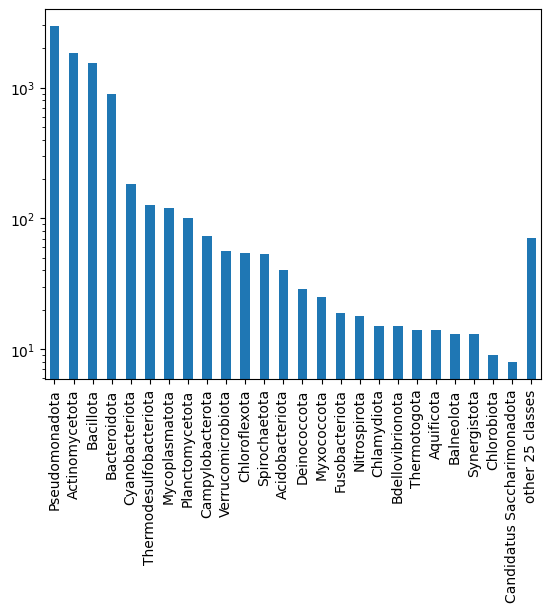

In [13]:
# Choose a taxonomical level in the list
taxa_level = 'phylum'
n_max_classes = 25

fig, ax = plt.subplots()
ax.set_yscale('log')
ax = pu.plot_sorted_bar(ax, objects[taxa_level].value_counts(), n_max_classes)